<a href="https://colab.research.google.com/github/Haebuk/sparta_ML/blob/main/1%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5_02_%EC%BA%90%EA%B8%80_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle 캐글

https://kaggle.com

캐글은 머신러닝 엔지니어가 레벨업 할 수 있는 던전이자, 사냥터입니다. 수많은 공개된 데이터셋과 각 데이터셋 별로 사람들이 분석한 결과들을 모아놓은 플랫폼이죠.

기업 및 단체에서 Prize를 걸고 데이터와 해결 과제를 등록하면, 데이터 사이언티스트들이 이를 해결하기 위해 모델을 개발하고 경쟁하기도 하는 플랫폼입니다.

## Colab에서 Kaggle 데이터셋 다운로드 방법

1. [Kaggle](https://www.kaggle.com) 회원가입
2. Account(계정) 페이지 진입 (https://www.kaggle.com/[사옹자이름]/account)
3. API - Create New API Token 클릭하고 kaggle.json 다운로드
4. 브라우저에서 json 파일을 열어 username 및 key 복사
5. 아래 코드에 자신의 username 및 key를 붙여넣어 환경변수 설정 실행

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = 'haebuk' # username
os.environ['KAGGLE_KEY'] = '012556a132f44be2d63242c5ac5178d4' # key

## 광고 데이터셋 다운로드

1. Kaggle에서 원하는 데이터셋을 검색 (예: https://www.kaggle.com/ashydv/advertising-dataset)
2. [Copy API command] 버튼 클릭 (New Notebook 옆에 ... 버튼 클릭)
3. 코드 셀에 붙여넣고 실행! (맨 앞에 "!" 꼭 붙이는거 잊지 마세요!)



In [2]:
!kaggle datasets download -d ashydv/advertising-dataset

  0% 0.00/1.83k [00:00<?, ?B/s]
100% 1.83k/1.83k [00:00<00:00, 3.18MB/s]


데이터셋 압축 해제

In [3]:
!unzip /content/advertising-dataset.zip

Archive:  /content/advertising-dataset.zip
  inflating: advertising.csv         


##  광고 데이터 예측 (Single-variable linear regression)

TV 광고 금액으로 Sales 예측하기

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

### 데이터셋 로드

In [5]:
df = pd.read_csv('advertising.csv')
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### 데이터셋 크기 살펴보기

In [6]:
print(df.shape)

(200, 4)


### 데이터셋 살짝 살펴보기

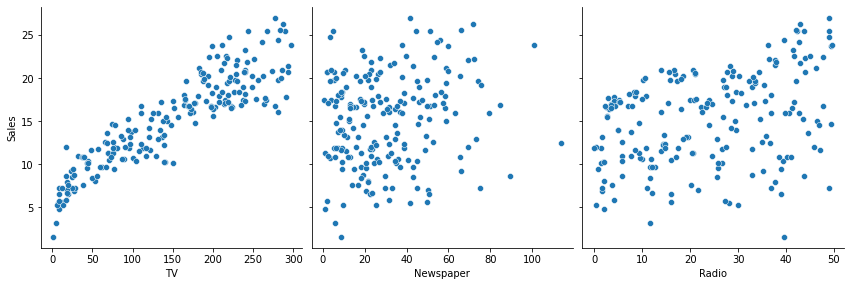

In [7]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars=['Sales'], height=4)

### 데이터셋 가공

In [8]:
x_data = np.array(df[['TV']], dtype=np.float32)
y_data = np.array(df['Sales'], dtype=np.float32)

print(x_data.shape)
print(y_data.shape)

(200, 1)
(200,)


In [10]:
x_data = x_data.reshape((-1, 1))
y_data = y_data.reshape((-1, 1)) # 컬럼을 1로 맞추고 -1은 아무렇게나를 의미

print(x_data.shape)
print(y_data.shape)

(200, 1)
(200, 1)


### 데이터셋 분할

학습 데이터 80%
검증 데이터 20%


In [11]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2021)

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(160, 1) (40, 1)
(160, 1) (40, 1)


### 학습

In [13]:
model = Sequential([
  Dense(1)
])

model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.1)) # 묻따 아담

model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val), # 검증 데이터를 넣어주면 한 epoch이 끝날때마다 자동으로 검증
    epochs=100 # epochs 복수형으로 쓰기!
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
5/5 [==============================] - 1s 36ms/step - loss: 29178.6621 - val_loss: 15790.0176
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 8413.6064 - val_loss: 2124.1558
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 698.1550 - val_loss: 246.2557
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 908.2205 - val_loss: 2109.7073
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 2186.5388 - val_loss: 2214.2109
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 1552.1241 - val_loss: 886.3916
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 443.4432 - val_loss: 54.2593
Epoch 8/100
5/5 [==============================] - 0s 9ms/step - loss: 46.8293 - val_loss: 170.6309
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: 215.7784 - val_loss: 328.9714
Epoch 10/100
5/5 [==============================] - 0s 7ms/step - loss: 246.3414 -

### 검증 데이터로 예측하기

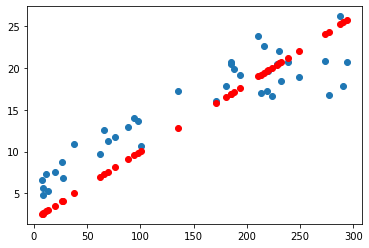

In [14]:
y_pred = model.predict(x_val)

plt.scatter(x_val, y_val)
plt.scatter(x_val, y_pred, color='r')
plt.show()

## 광고 데이터 예측하기 (Multi-variable linear regression)

TV, Newspaper, Radio 광고 금액으로 Sales 예측하기

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv('advertising.csv')

x_data = np.array(df[['TV', 'Newspaper', 'Radio']], dtype=np.float32)
y_data = np.array(df['Sales'], dtype=np.float32)

x_data = x_data.reshape((-1, 3))
y_data = y_data.reshape((-1, 1))

print(x_data.shape)
print(y_data.shape)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2021)

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

model = Sequential([
  Dense(1)
])

model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.1))

model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val), # 검증 데이터를 넣어주면 한 epoch이 끝날때마다 자동으로 검증
    epochs=100 # epochs 복수형으로 쓰기!
)

(200, 3)
(200, 1)
(160, 3) (40, 3)
(160, 1) (40, 1)
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 30ms/step - loss: 20855.3164 - val_loss: 7378.1851
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 2873.1973 - val_loss: 739.6560
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 2018.0039 - val_loss: 3222.3901
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 3498.3481 - val_loss: 2308.8384
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 1587.5320 - val_loss: 421.9076
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 321.5279 - val_loss: 473.1296
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 574.5201 - val_loss: 752.3761
Epoch 8/100
5/5 [==============================] - 0s 7ms/step - loss: 513.7662 - val_loss: 279.0286
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: 136.9622 - val_loss: 71.5134
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 117.0397 - val_loss: 1

In [16]:
y_pred = model.predict(x_val)

print(y_pred.shape)

(40, 1)


3차원으로 그리기 힘들어서 변수를 쪼개서 그래프를 그려 비교

## TV 데이터 예측 그래프

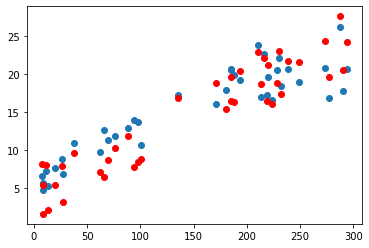

In [17]:
plt.scatter(x_val[:, 0], y_val)
plt.scatter(x_val[:, 0], y_pred, color='r')
plt.show()

## Newspaper 데이터 예측 그래프

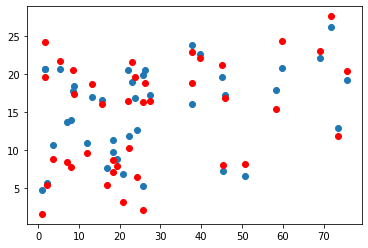

In [18]:
plt.scatter(x_val[:, 1], y_val)
plt.scatter(x_val[:, 1], y_pred, color='r')
plt.show()

### Radio 데이터 예측 그래프

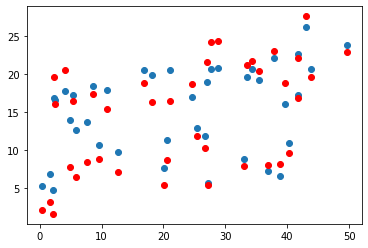

In [19]:
plt.scatter(x_val[:, 2], y_val)
plt.scatter(x_val[:, 2], y_pred, color='r')
plt.show()

예측이 잘 됨